# Galaxies within 0.2 dex of Main Sequence Relation

#### Cosmology: Planck2015
#### Simulation Name: TNG-50
#### Redshift Bin:1.45-2.05
33	0.3333	2<br>
40	0.4	1.5

In [51]:
import illustris_python as il
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo
from scipy.optimize import curve_fit
from sklearn.linear_model import HuberRegressor

# PREPARING THE DATA
The following data is available:<br>
1. Subhalo Mass
2. $R_{eff}$
3. Stellar Mass
4. Dark Matter Mass
5. Gaseous Mass
6. SFR
7. $V_{max}$
8. Velocity Dispersion

### z=1.5

In [2]:
basePath = 'sims.TNG/TNG50-1/output'
full_data=il.groupcat.loadSubhalos(basePath,40,fields=['SubhaloMassType','SubhaloHalfmassRad','SubhaloHalfmassRadType','SubhaloFlag','SubhaloMass','SubhaloSFR','SubhaloVmax','SubhaloVelDisp'])
full_data

{'count': 7239049,
 'SubhaloMassType': array([[1.73874359e+02, 1.53960583e+03, 0.00000000e+00, 0.00000000e+00,
         7.12990265e+01, 1.02805205e-01],
        [3.98984299e+01, 3.54849915e+02, 0.00000000e+00, 0.00000000e+00,
         2.25747890e+01, 4.01438810e-02],
        [4.70965481e+00, 5.26606941e+01, 0.00000000e+00, 0.00000000e+00,
         6.38503027e+00, 2.07920391e-02],
        ...,
        [0.00000000e+00, 9.52839910e-04, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 6.76208932e-04, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 9.52839910e-04, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00]], dtype=float32),
 'SubhaloHalfmassRad': array([257.10464  , 155.22827  ,  40.379017 , ...,   3.0055456,
          2.4806168,   3.3694665], dtype=float32),
 'SubhaloHalfmassRadType': array([[307.88528  , 260.87335  ,   0.       ,   0.       ,   9.107152 ,
    

In [52]:
a=0.4
h=0.6774

z1_Subhaloflag=full_data['SubhaloFlag']
z1_Subhalomass_gas=full_data['SubhaloMassType'][:,0]*1e10/h
z1_Subhalomass_star=full_data['SubhaloMassType'][:,4]*1e10/h
z1_Subhalomass_dm=full_data['SubhaloMassType'][:,1]*1e10/h
z1_Subhalo_sreff=full_data['SubhaloHalfmassRadType'][:,4]*a/h
z1_Subhalo_reff=full_data['SubhaloHalfmassRad']*a/h
z1_Subhalo_sfr=full_data['SubhaloSFR']
z1_Subhalo_Flag=full_data['SubhaloFlag']
z1_Subhalo_Vmax=full_data['SubhaloVmax']
z1_Subhalo_Sigma=full_data['SubhaloVelDisp']
z1_Subhalo_mass=full_data['SubhaloMass']*1e10/h
z1=np.full((len(z1_Subhalomass_gas),1),1.5)

Conversion of units from comoving to physical, $\frac{10^{10}}{h} M_{\odot}$ to $M_{\odot}$ etc

### z=2

In [4]:
full_data2=il.groupcat.loadSubhalos(basePath,33,fields=['SubhaloMassType','SubhaloHalfmassRad','SubhaloHalfmassRadType','SubhaloFlag','SubhaloMass','SubhaloSFR','SubhaloVmax','SubhaloVelDisp'])

In [53]:
a=0.3333
h=0.6774

z2_Subhaloflag=full_data2['SubhaloFlag']
z2_Subhalomass_gas=full_data2['SubhaloMassType'][:,0]*1e10/h
z2_Subhalomass_star=full_data2['SubhaloMassType'][:,4]*1e10/h
z2_Subhalomass_dm=full_data2['SubhaloMassType'][:,1]*1e10/h
z2_Subhalo_sreff=full_data2['SubhaloHalfmassRadType'][:,4]*a/h
z2_Subhalo_reff=full_data2['SubhaloHalfmassRad']*a/h
z2_Subhalo_sfr=full_data2['SubhaloSFR']
z2_Subhalo_Flag=full_data2['SubhaloFlag']
z2_Subhalo_Vmax=full_data2['SubhaloVmax']
z2_Subhalo_Sigma=full_data2['SubhaloVelDisp']
z2_Subhalo_mass=full_data2['SubhaloMass']*1e10/h
z2=np.full((len(z2_Subhalomass_gas),1),2)

Pick galaxies of cosmological origin only, remove ones with SFR and Mass<0

In [6]:
def good_galaxies(z_fields):
    z_Subhaloflag,z_Subhalomass_gas,z_Subhalomass_star,z_Subhalomass_dm,z_Subhalo_reff,z_Subhalo_sreff,z_Subhalo_sfr,z_Subhalo_Vmax,z_Subhalo_Sigma,z_Subhalo_mass,z=z_fields
    good_ones=np.where((z_Subhaloflag==True) &(z_Subhalomass_star > 0) & (z_Subhalo_sfr > 0) &(z_Subhalomass_star != np.nan) &(z_Subhalo_sfr != np.nan))

    newfields=[field[good_ones] for field in z_fields]
    return newfields

In [54]:
z1_Subhaloflag,z1_Subhalomass_gas,z1_Subhalomass_star,z1_Subhalomass_dm,z1_Subhalo_reff,z1_Subhalo_sreff,z1_Subhalo_sfr,z1_Subhalo_Vmax,z1_Subhalo_Sigma,z1_Subhalo_mass,z1=good_galaxies([z1_Subhaloflag,z1_Subhalomass_gas,z1_Subhalomass_star,z1_Subhalomass_dm,z1_Subhalo_reff,z1_Subhalo_sreff,z1_Subhalo_sfr,z1_Subhalo_Vmax,z1_Subhalo_Sigma,z1_Subhalo_mass,z1])
z2_Subhaloflag,z2_Subhalomass_gas,z2_Subhalomass_star,z2_Subhalomass_dm,z2_Subhalo_reff,z2_Subhalo_sreff,z2_Subhalo_sfr,z2_Subhalo_Vmax,z2_Subhalo_Sigma,z2_Subhalo_mass,z2=good_galaxies([z2_Subhaloflag,z2_Subhalomass_gas,z2_Subhalomass_star,z2_Subhalomass_dm,z2_Subhalo_reff,z2_Subhalo_sreff,z2_Subhalo_sfr,z2_Subhalo_Vmax,z2_Subhalo_Sigma,z2_Subhalo_mass,z2])

# Speagle's Relation
log SFR(M∗, t) = (0.84 ± 0.02 − 0.026 ± 0.003 × t) log M∗−(6.51 ± 0.24 − 0.11 ± 0.03 × t)

# z=1.5

In [8]:
def speagle_params(z):
    t=cosmo.age(z).value
    return 0.84-0.026*t, -(6.51-0.11*t)

def speagle(z,logmass):
    return speagle_params(z)[0]*logmass+speagle_params(z)[1]

In [9]:
def pearson(z,logmass):
    slope=1.1+0.5*np.log(0.03+z)
    intercept=0.38+0.12*z-10.5*slope
    return slope*logmass+intercept

In [10]:
def santini(z,logmass):
    if z<2 and z>1.3:
        return 1.04*logmass-9.7+1.01
    elif z<3 and z>=2:
        return 1.16*logmass-9.7+1.22
    elif z==3:
        return 1.02*logmass-9.7+1.37

In [11]:
def iyer(z,logmass):
    t=cosmo.age(z).value
    return (0.80-0.017*t)*logmass-(6.487-0.039*t)

In [12]:
def compare_mainseq(z,log_ms,log_sfr):
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111)
    ax.plot(log_ms,log_sfr,'.',markersize=2)
    x=np.linspace(8,11.5,len(log_ms))
    pearson_values=pearson(z,x)
    speagle_values=speagle(z,x)
    santini_values=santini(z,x)
    iyer_values=iyer(z,x)
    
    ax.plot(x,santini_values,label='Santini et al 2017',linewidth=4,color='green')
    ax.plot(x,pearson_values,label='Pearson et al 2018',linewidth=4,color='brown')
    ax.plot(x,speagle_values,label='Speagle et al 2014',linewidth=4,color='red')
    ax.plot(x,iyer_values,label='Iyer et al 2018',linewidth=4,color='yellow')

    ax.set_xlim(8,11.5)
    ax.set_xlabel('log Galaxy Stellar Mass [$M_\odot$, $r < 2*r_{1/2 M_\star}$]')
    ax.set_ylabel('log Star Formation Rate [yr$^{-1}$]')
    ax.legend()
    plt.show()    

In [55]:
log_ms=np.log10(z1_Subhalomass_star)
log_sfr=np.log10(z1_Subhalo_sfr)

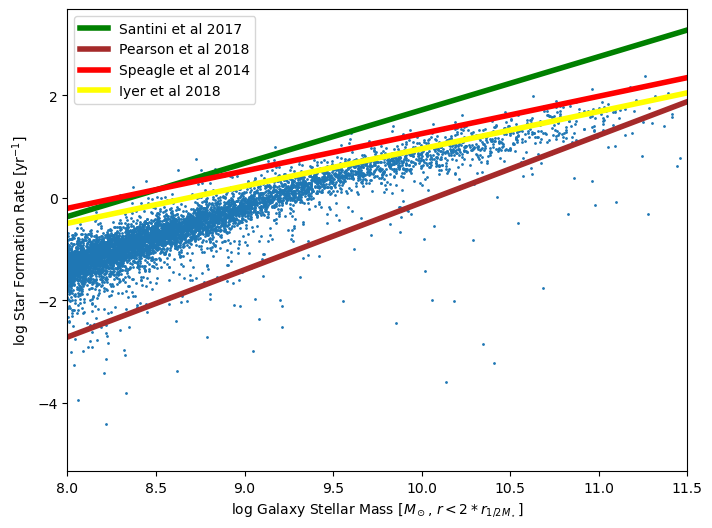

In [14]:
compare_mainseq(1.5,log_ms,log_sfr)

Iyer is the best fit

In [56]:
good_ones=np.where((abs(iyer(1.5,log_ms)-log_sfr)<0.6))
fields=z1_Subhalomass_gas,z1_Subhalomass_star,z1_Subhalomass_dm,z1_Subhalo_reff,z1_Subhalo_sreff,z1_Subhalo_sfr,z1_Subhalo_Vmax,z1_Subhalo_Sigma,z1_Subhalo_mass,z1
newfields=[field[good_ones] for field in fields]
z1_Subhalomass_gas,z1_Subhalomass_star,z1_Subhalomass_dm,z1_Subhalo_reff,z1_Subhalo_sreff,z1_Subhalo_sfr,z1_Subhalo_Vmax,z1_Subhalo_Sigma,z1_Subhalo_mass,z1=newfields

In [57]:
log_ms=np.log10(z1_Subhalomass_star)
log_sfr=np.log10(z1_Subhalo_sfr)

## Binning the Data

In [17]:
def bin_data(log_ms,log_sfr,nbins,std=False):
    mass_bins=np.linspace(log_ms.min(),log_ms.max(),nbins,endpoint=True)
    bin_indices=np.digitize(log_ms, mass_bins, right=False)
    binned_data={bin_start:[] for bin_start in mass_bins[0:-1]}

    for i, bin_start in enumerate(mass_bins[0:-1]):
        mask=bin_indices==i+1
        binned_data[bin_start]=list(zip(log_ms[mask],log_sfr[mask]))
        
    logms_binned=[(mass_bins[i]+mass_bins[i+1])/2 for i in range(len(mass_bins)-1)]
    logsfr_binned = [np.median([i[1] for i in binned_data[bin_start]]) for bin_start in mass_bins[0:-1]]
    std_binned=[np.std([i[1] for i in binned_data[bin_start]]) for bin_start in mass_bins[0:-1]]
    
    if std== True:
        return logms_binned,logsfr_binned,std_binned
        
    return logms_binned,logsfr_binned

In [58]:
logms_binned,logsfr_binned=bin_data(log_ms,log_sfr,15)

## Attempting to Match Simulation Data with Observations

In [59]:
def line(x,m,c):
    return m*x+c

popt,pcov=curve_fit(line,logms_binned,logsfr_binned)

In [20]:
def plot_iyer(z,log_ms,log_sfr,logms_binned,logsfr_binned):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.plot(log_ms,log_sfr,'.',markersize=2)
    x=np.linspace(8,11.5,len(log_ms))
    iyer_values=iyer(z,x)

    ax.plot(x,iyer_values,label='Iyer et al 2018',linewidth=4,color='brown')
    ax.plot(x,line(x,popt[0],popt[1]),label='Best Fit',linewidth=4,color='green')
    ax.plot(x,iyer_values+0.3,'--',color='black',linewidth=2)
    ax.plot(x,iyer_values-0.3,'--',color='black',linewidth=2)
    ax.scatter(logms_binned,logsfr_binned,color='orange',s=40,zorder=5)

    ax.set_xlim(8,11.5)
    ax.set_xlabel('log Galaxy Stellar Mass [$M_\odot$, $r < 2*r_{1/2 M_\star}$]')
    ax.set_ylabel('log Star Formation Rate [yr$^{-1}$]')
    ax.legend()
    plt.show()

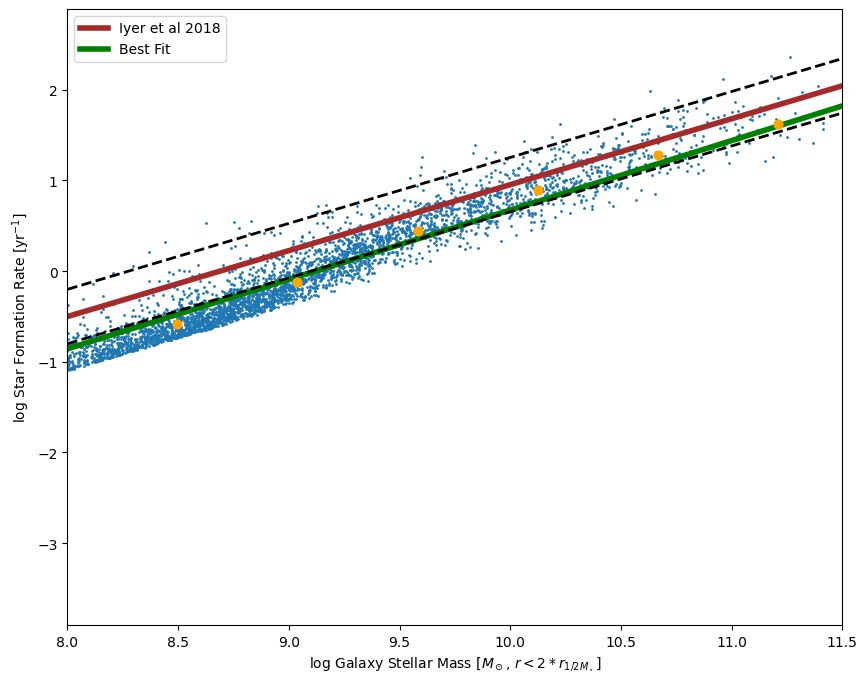

In [60]:
plot_iyer(1.5,log_ms,log_sfr,logms_binned,logsfr_binned)

# z=2

In [61]:
log_ms=np.log10(z2_Subhalomass_star)
log_sfr=np.log10(z2_Subhalo_sfr)

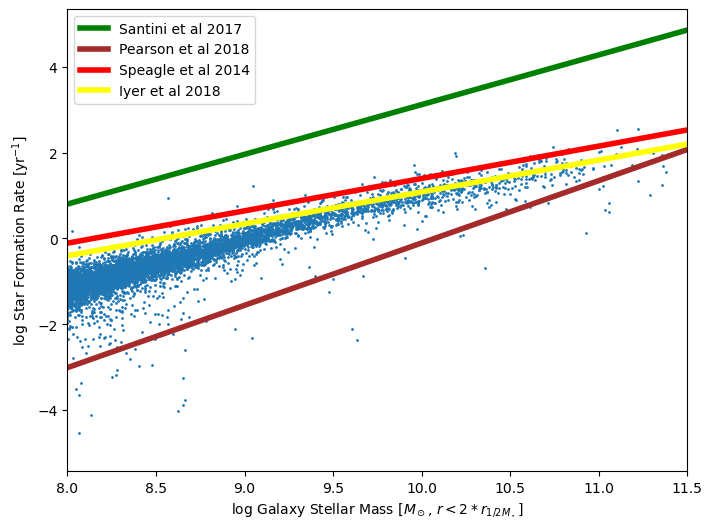

In [23]:
compare_mainseq(2,log_ms,log_sfr)

Iyer is a better fit

In [62]:
good_ones=np.where((abs(iyer(2,log_ms)-log_sfr)<0.6))
fields=z2_Subhalomass_gas,z2_Subhalomass_star,z2_Subhalomass_dm,z2_Subhalo_reff,z2_Subhalo_sreff,z2_Subhalo_sfr,z2_Subhalo_Vmax,z2_Subhalo_Sigma,z2_Subhalo_mass,z2
newfields=[field[good_ones] for field in fields]
z2_Subhalomass_gas,z2_Subhalomass_star,z2_Subhalomass_dm,z2_Subhalo_reff,z2_Subhalo_sreff,z2_Subhalo_sfr,z2_Subhalo_Vmax,z2_Subhalo_Sigma,z2_Subhalo_mass,z2=newfields

In [63]:
log_ms=np.log10(z2_Subhalomass_star)
log_sfr=np.log10(z2_Subhalo_sfr)

In [64]:
logms_binned,logsfr_binned=bin_data(log_ms,log_sfr,15)

In [65]:
popt,pcov=curve_fit(line,logms_binned,logsfr_binned)

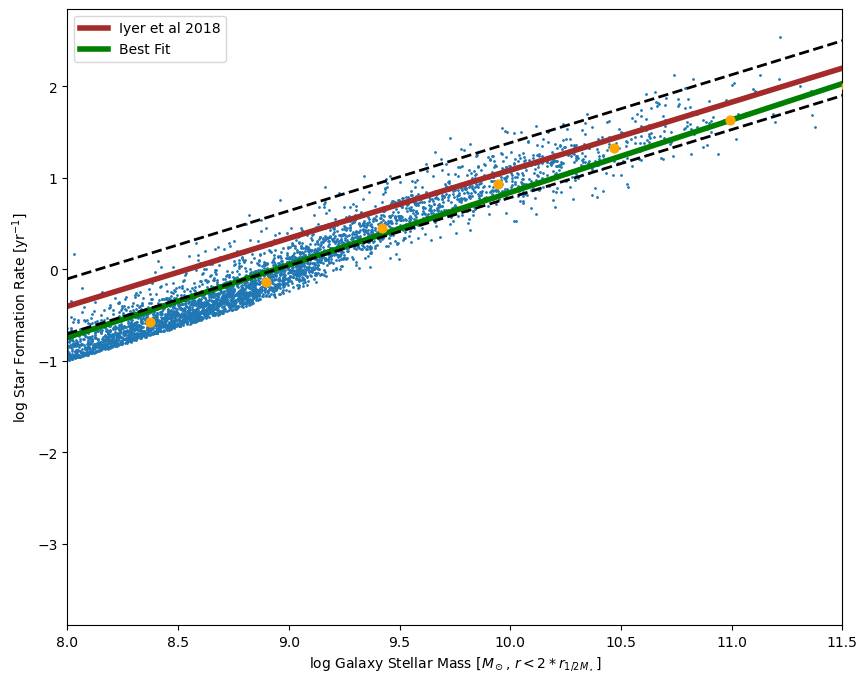

In [66]:
plot_iyer(2,log_ms,log_sfr,logms_binned,logsfr_binned)

In [68]:
Subhalomass_gas=np.concatenate((z1_Subhalomass_gas,z2_Subhalomass_gas),axis=None)
Subhalomass_star=np.concatenate((z1_Subhalomass_star,z2_Subhalomass_star),axis=None)
Subhalomass_dm=np.concatenate((z1_Subhalomass_dm,z2_Subhalomass_dm),axis=None)
Subhalo_reff=np.concatenate((z1_Subhalo_reff,z2_Subhalo_reff),axis=None)
Subhalo_sreff=np.concatenate((z1_Subhalo_sreff,z2_Subhalo_sreff),axis=None)
Subhalo_sfr=np.concatenate((z1_Subhalo_sfr,z2_Subhalo_sfr),axis=None)
Subhalo_Vmax=np.concatenate((z1_Subhalo_Vmax,z2_Subhalo_Vmax),axis=None)
Subhalo_Sigma=np.concatenate((z1_Subhalo_Sigma,z2_Subhalo_Sigma),axis=None)
Subhalo_mass=np.concatenate((z1_Subhalo_mass,z2_Subhalo_mass),axis=None)
z=np.concatenate((z1,z2),axis=None)

# MASSSIZE

In [69]:
good_ones=np.where(Subhalo_sreff > 0)
fields=[Subhalomass_gas,Subhalomass_star,Subhalomass_dm,Subhalo_reff,Subhalo_sreff,Subhalo_sfr,Subhalo_Vmax,Subhalo_Sigma,Subhalo_mass,z]

newfields=[field[good_ones] for field in fields]
Subhalomass_gas,Subhalomass_star,Subhalomass_dm,Subhalo_reff,Subhalo_sreff,Subhalo_sfr,Subhalo_Vmax,Subhalo_Sigma,Subhalo_mass,z=newfields

In [70]:
log_ms=np.log10(Subhalomass_star)
log_sreff=np.log10(Subhalo_sreff)

In [71]:
good_ones=np.where((log_ms > 8) & (log_ms <11.5))
fields=[Subhalomass_gas,Subhalomass_star,Subhalomass_dm,Subhalo_reff,Subhalo_sreff,Subhalo_sfr,Subhalo_Vmax,Subhalo_Sigma,Subhalo_mass,z]

newfields=[field[good_ones] for field in fields]
Subhalomass_gas,Subhalomass_star,Subhalomass_dm,Subhalo_reff,Subhalo_sreff,Subhalo_sfr,Subhalo_Vmax,Subhalo_Sigma,Subhalo_mass,z=newfields

In [72]:
log_ms=np.log10(Subhalomass_star)
log_reff=np.log10(Subhalo_sreff)

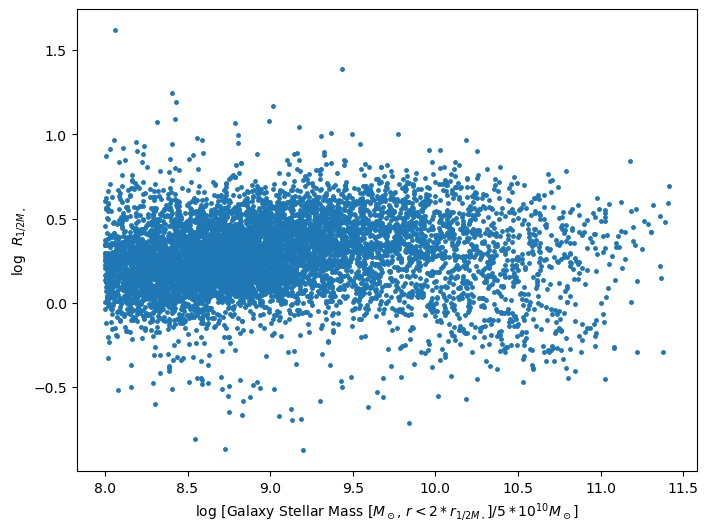

In [34]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(log_ms,log_reff,'.',markersize=5)

ax.set_xlabel('log [Galaxy Stellar Mass [$M_\odot$, $r < 2*r_{1/2 M_\star}]/5*10^{10}M_\odot$]')
ax.set_ylabel('log  $R_{1/2 M_\star}$')
plt.show()

## MASS-SIZE RELATION

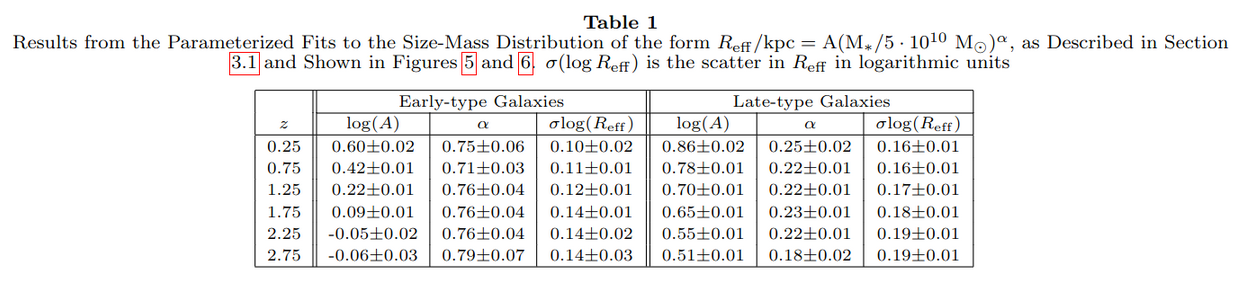


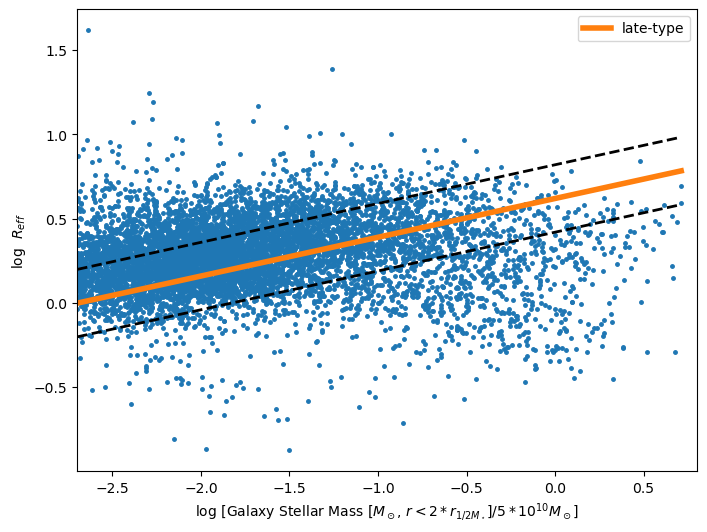

In [73]:
log_ms_scaled=log_ms-np.log10(5e+10)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

ax.plot(log_ms_scaled,log_reff,'.',markersize=5)

ax.set_xlabel('log [Galaxy Stellar Mass [$M_\odot$, $r < 2*r_{1/2 M_\star}]/5*10^{10}M_\odot$]')
ax.set_ylabel('log  $R_{eff}$')

x=np.linspace(min(log_ms_scaled),max(log_ms_scaled))
ax.plot(x,0.62+0.23*x,label='late-type',linewidth=4)
ax.plot(x,0.62+0.23*x-0.2,'--',color='black',linewidth=2)
ax.plot(x,0.62+0.23*x+0.2,'--',color='black',linewidth=2)
ax.set_xlim(-2.7,0.802)

ax.legend()
plt.show()

## FITTING

In [36]:
def mass_size(logmass_scaled):
    return 0.62+0.23*logmass_scaled

Apply as selection cut of 0.3 dex on either side of the mass-size relation

In [74]:
good_ones=np.where(abs(mass_size(log_ms_scaled)-log_reff)<0.36)
fields=[Subhalomass_gas,Subhalomass_star,Subhalomass_dm,Subhalo_reff,Subhalo_sreff,Subhalo_sfr,Subhalo_Vmax,Subhalo_Sigma,Subhalo_mass,z]

newfields=[field[good_ones] for field in fields]
Subhalomass_gas,Subhalomass_star,Subhalomass_dm,Subhalo_reff,Subhalo_sreff,Subhalo_sfr,Subhalo_Vmax,Subhalo_Sigma,Subhalo_mass,z=newfields

In [75]:
log_ms=np.log10(Subhalomass_star)
log_reff=np.log10(Subhalo_sreff)
log_ms_scaled=log_ms-np.log10(5e+10)

In [42]:
huber_regressor = HuberRegressor(epsilon=1.35) 

log_ms_scaled_reshaped = np.reshape(log_ms_scaled, (-1, 1))
log_reff_reshaped = np.reshape(log_reff, (-1, 1))

huber_regressor.fit(log_ms_scaled_reshaped, log_reff_reshaped) 

/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HuberRegressor()

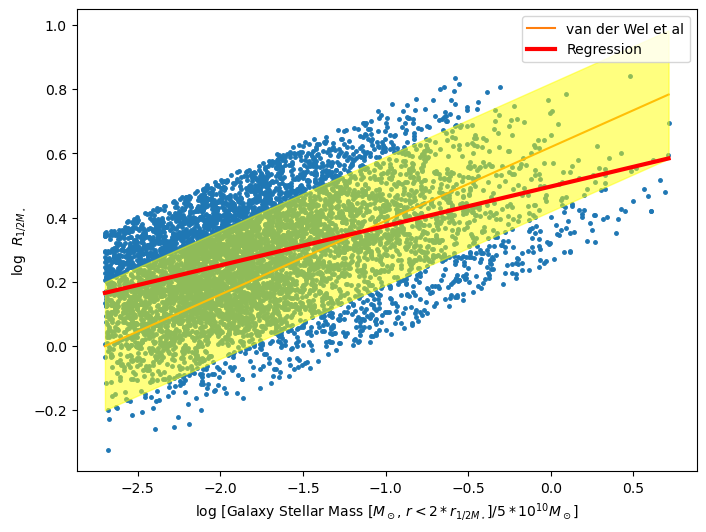

In [48]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(log_ms_scaled,log_reff,'.',markersize=5)
x_values=np.linspace(log_ms_scaled.min(),log_ms_scaled.max(),100)
ax.plot(x_values,mass_size(x_values),label='van der Wel et al')
y_pred_huber = huber_regressor.predict(np.reshape(x_values,(-1,1)))


ax.fill_between(x_values,mass_size(x_values)+0.2,mass_size(x_values)-0.2,color='yellow',alpha=0.5,zorder=2)
ax.plot(x_values,y_pred_huber,label='Regression',linewidth=3,color='red')

ax.set_xlabel('log [Galaxy Stellar Mass [$M_\odot$, $r < 2*r_{1/2 M_\star}]/5*10^{10}M_\odot$]')
ax.set_ylabel('log  $R_{1/2 M_\star}$')
ax.legend()
plt.show()

In [49]:
df=pd.DataFrame({'$M_{gas},M_{\odot}$':Subhalomass_gas,'$M_{stellar},M_{\odot}$':Subhalomass_star,'$M_{DM},M_{\odot}$':Subhalomass_dm,'$R_{eff}$(kpc)':Subhalo_reff,'SFR($M_{\odot}/yr$)':Subhalo_sfr,'$V_{max}$(km/s)':Subhalo_Vmax,'$\sigma_v$(km/s)':Subhalo_Sigma,
                'M':Subhalo_mass,'z':z})
df

,"$M_{gas},M_{\odot}$","$M_{stellar},M_{\odot}$","$M_{DM},M_{\odot}$",$R_{eff}$(kpc),SFR($M_{\odot}/yr$),$V_{max}$(km/s),$\sigma_v$(km/s),M,z
0,6.055919e+10,3.330589e+10,5.500920e+11,36.415905,21.828768,243.961563,121.624474,6.440242e+11,1.5
1,3.464736e+10,1.695947e+10,2.506948e+11,22.187248,7.238385,185.681503,101.168083,3.023287e+11,1.5
2,3.675877e+10,2.082861e+10,1.629013e+11,13.255627,16.666262,189.299240,113.676292,2.205168e+11,1.5
3,3.871132e+10,1.179118e+10,2.116912e+11,23.406826,10.273208,172.480804,95.918594,2.622059e+11,1.5
4,3.514238e+10,1.412577e+10,1.167494e+11,11.523466,13.462406,176.155334,97.692574,1.660312e+11,1.5
...,...,...,...,...,...,...,...,...,...
6547,2.244835e+09,1.250167e+08,2.027475e+10,11.370322,0.136831,66.137939,38.090622,2.264459e+10,2.0
6548,1.571130e+09,1.229431e+08,2.079973e+10,11.556223,0.118360,64.818123,38.810276,2.249380e+10,2.0
6549,1.669944e+09,1.012433e+08,1.862674e+10,10.269891,0.101049,65.415489,37.430290,2.039792e+10,2.0
6550,2.704185e+09,1.347020e+08,1.434564e+10,10.248308,0.178987,60.179108,34.430347,1.718453e+10,2.0


In [50]:
df.to_csv('1.45-2.05_new.csv')